# Classes and Objects
I will re-iterate that this is not a programming course, and I'm not here to teach you the basics of coding. However, there are some important concepts I will go over in lab that I expect you to work on on your own if you want to succeed in this class.

Object oriented programming is one of them: the concept of classes and objects is incredibly important in Python (and many other languages). In this section we will review the basics of class definitions and demonstrate a few common cases.

## Class Definitions

In [ ]:
# example class with lots going on
class ExampleClass(object):
    static_var = 'static'
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def multiply(self):
        return self.x * self.y

    def swap(self):
        temp_x = self.x
        self.x = self.y
        self.y = temp_x
    
    def replace(self, x=None, y=None):
        if x is not None:
            self.x = x
        if y is not None:
            self.y = y

In [ ]:
# before we break down whats going on, here is an example of usage:

# instance create
example_1 = ExampleClass(1, 2)
example_2 = ExampleClass(3, 4)
# now you can call methods on them
print(example_1.multiply())
print(example_2.multiply())

# objects carry state
example_1.replace(x=12)
print(example_1.multiply())

# classes, like lists, are mutable. So when you do an assignment you're working with a reference and don't automatically perform as deep copy
example_1_copy = example_1
print(example_1.x)
example_1_copy.swap()
print(example_1.x)

2
12
24
12
2


Now let's get into the semantics of classes. Starting at the top:

```
class ExampleClass(object):
```
We have three key things here:
1. `class` --> a keyword to indicate we are creating a class
2. `ExampleClass` --> the name of the class. Although this isn't a rule it is good practice to use Upper CamelCase
    - Sidenote: you'll see me use `snake_case` for variables and upper `CamelCase` for classes. See [PEP 8](https://www.python.org/dev/peps/pep-0008/#naming-conventions) for a full review of naming conventions
3. `object` --> This is the class which we are inheriting from. Since in python everything is by default an `object`, inheriting from `object` is meaningless. I could have used `class ExampleClass:` for the same effect

```
class ExampleClass(object):
    static_var = 'static'
```

Looking now at the next line, we can see `static_var` declared. This variable is a little tricky, as it is actually part of the class rather than the instance. This means that we can call `ExampleClass.static_var` and get the value.

But what does this mean if we change the value of `static_var`?

In [ ]:
# looks normal, if we change the value of one of the instances the other remains the same
print(example_1.static_var)
print(example_2.static_var)
ExampleClass.static_var = 'dynamic'
print(example_1.static_var)
print(example_2.static_var)

dynamic
static
dynamic
dynamic


However, this is one of those cases where variable mutability matters! Let's make static_var a list instead of a string and see what happens

In [ ]:
# example class with lots going on
class ExampleClass(object):
    static_var = ['static']
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def multiply(self):
        return self.x * self.y

    def swap(self):
        temp_x = self.x
        self.x = self.y
        self.y = temp_x
    
    def replace(self, x=None, y=None):
        if x is not None:
            self.x = x
        if y is not None:
            self.y = y

In [ ]:
example_3 = ExampleClass(1, 2)
example_4 = ExampleClass(3, 4)

In [ ]:
print(example_3.static_var)
print(example_4.static_var)
example_3.static_var.append(2)
print(example_3.static_var)
print(example_4.static_var)

['static']
['static']
['static', 2]
['static', 2]


Now it changes. This is because when the instance of the class is created it only copies the **reference** to the variable. 

So what do you do with this information? My advice: be cautious.

Only ever use class variables for static values that you don't expect to change. It isn't worth the hassle of remembering if the data type is mutable or not, and it may end up hurting you.

---

Back to the class:

```
class ExampleClass(object):
    static_var = ['static']
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
```
 The `__init__` function is automatically called upon instance creation. The variable `self` is a reference to the internal object state and the other variables (in our case `x` and `y`) are used to initiaze the instance.

 You can see we call the `super().__init__()` function. What this does is intializes the parent class of our class. Now since the parent class of our class is the `object` class, this does nothing. The last two lines are simple assignments. Copying over the variables of `x` and `y` to the object's internal state so they can be used later.

**Full Class**
 ```
 class ExampleClass(object):
    static_var = ['static']
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def multiply(self):
        return self.x * self.y

    def swap(self):
        temp_x = self.x
        self.x = self.y
        self.y = temp_x
    
    def replace(self, x=None, y=None):
        if x is not None:
            self.x = x
        if y is not None:
            self.y = y
 ```
 You can see we defined a few functions here, some with inputs some without. You'll also see the keyword `self` a lot. `self` refers to the object it**self**. For most functions you'll have that as the first argument, and use that reference to access the object's internal state.

 **Note**:
 - `self` doesn't need to be called `self`, but you shouldn't call it anything else (it'll just be confusing). The meaning comes from it being the first variable rather than the name
 - There are things called *Static Methods* which don't need `self`, but we won't go into those.
 - Methods with `self` in them can't be called on the class, they must be called on an instance

## Class Exercise 1

1. Create a class called `Person` which has the following characteristics
    - Input variables which set the person's age and name
    - A function returns the person's age categorization with the following condtionals:
        - < 1 = infant
        - < 11 = child
        - < 18 = teenager
        - otherwise: adult
    - Write a function which updates the name
    - Write a function called `birthday` which increases the person's age by `1` and returns the new age

Create an instance of your class and test all your functions

## Class Exercise 2

2. Create a class called `Student` which inherits from `Person` and has the following characteristics
    - Input variables which set the student's major and university name
    - A function returns a desciption of the student
        - Their name, age, major and university

**Aside**: String formatting
- String formatting is super simple in python. You can insert variables directly into strings using "f strings":
```
x = 10
y = 100
v = "hello"
new_str = f"{v} world x is equal to {x}, Y is equal to {y}"
```


# Bonus Material

Jupyter magic and working with images

## Jupyter magic

There are some cool features that are good to know about jupyter, they're often referred to as "magic" commands as they don't follow normal python syntax


### Calling system commands

One great feature that jupyter provides is being able to make calls to the underlying system. We do this using the `!` operator at the beginning of a command

In [3]:
# getting the current directory
!pwd
# touching a file
!touch test_file
# listing the contents
!ls

/content
sample_data  test_file


If you're familiar with bash syntax then you can take advantage of these commands to seamlessly integrate bash and python

In [8]:
# create variable in python
value = 'hello world'
# use variable in bash
!echo $value

## This also works the other way
current_dir = !pwd
print(current_dir)

hello world
['/content']


### Useful bash commands
Some basic, but useful, commands you will see in this class mostly revolve around file management.

Let's say I want to download an image, I can use `wget`

In [9]:
!wget https://upload.wikimedia.org/wikipedia/commons/a/a5/Compound_Microscope_%28cropped%29.JPG

--2021-02-15 20:56:46--  https://upload.wikimedia.org/wikipedia/commons/a/a5/Compound_Microscope_%28cropped%29.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3188281 (3.0M) [image/jpeg]
Saving to: ‘Compound_Microscope_(cropped).JPG’

Compound_Microscope 100%[===================>]   3.04M  --.-KB/s    in 0.1s    

2021-02-15 20:56:46 (29.4 MB/s) - ‘Compound_Microscope_(cropped).JPG’ saved [3188281/3188281]



Or if I want to unzip a file

In [11]:
!wget https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-zip-file.zip
!unzip sample-zip-file.zip

--2021-02-15 20:57:35--  https://www.learningcontainer.com/wp-content/uploads/2020/05/sample-zip-file.zip
Resolving www.learningcontainer.com (www.learningcontainer.com)... 172.67.188.164, 104.21.84.74, 2606:4700:3033::ac43:bca4, ...
Connecting to www.learningcontainer.com (www.learningcontainer.com)|172.67.188.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 380 [application/zip]
Saving to: ‘sample-zip-file.zip.1’

sample-zip-file.zip 100%[===================>]     380  --.-KB/s    in 0s      

2021-02-15 20:57:35 (6.68 MB/s) - ‘sample-zip-file.zip.1’ saved [380/380]

Archive:  sample-zip-file.zip
  inflating: sample.txt              


In [12]:
!ls

'Compound_Microscope_(cropped).JPG'   sample-zip-file.zip
 sample_data			      sample-zip-file.zip.1
 sample.txt			      test_file


## Working with Images

In this class most of the data you deal with will be images. So it's useful to understand how to work with them and manipulate them.

When in python you will typically require an image processing library to read, write, and manipulate images. The major ones are:
- OpenCV
- PIL
- Scikit-Image

I usually use OpenCV, but that's simply my preference (and what I learned years ago)

In [13]:
# importing opencv
import cv2

# reading image
image = cv2.imread('Compound_Microscope_(cropped).JPG')
# showing image shape
image.shape

(3496, 2445, 3)

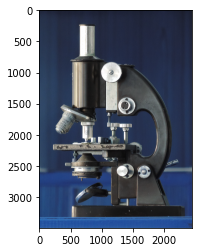

In [14]:
# we can use matplotlib to display images
import matplotlib.pyplot as plt
plt.imshow(image)

What looks wrong here?

OpenCV uses BGR, whereas everyone else using RGB

In [16]:
good_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

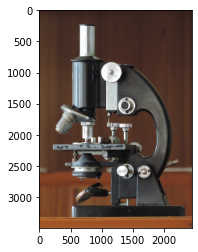

In [17]:
plt.imshow(good_image)

OpenCV provides a lot of nice functionalities to manipulate images:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#geometric-transformations

# Bonus exercise

1. Download a random image from the internet using wget
2. Load that image using OpenCV
3. Display the image using matplotlib
4. Create a 256x256 version of the image (using cv2.resize)
5. Display the resized image